In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the CSV file into a pandas DataFrame
file_path = "Business Forecasting Dataset CSV .csv"  # replace with your file path
df = pd.read_csv(file_path)

# Apply the log transformation to all numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[f'{col}_log'] = np.log(df[col])

# Save the transformed DataFrame to a new CSV file
df.to_csv("Transformed_Dataset.csv", index=False)

print("Log-transformed data saved as Transformed_Dataset.csv")


Log-transformed data saved as Transformed_Dataset.csv


In [2]:

# Load the transformed dataset
df = pd.read_csv("Transformed_Dataset.csv")

# Calculate CPI ratio and store it in a new column 'CPI Ratio'
df['CPI Ratio'] = df['CPI UK'] / df['CPI US']

# Take the natural logarithm of CPI ratio and store it in a new column 'ln(CPI Ratio)'
df['ln(CPI Ratio)'] = np.log(df['CPI Ratio'])

# Save the updated DataFrame to the Transformed_Dataset.csv file
df.to_csv("Transformed_Dataset.csv", index=False)


In [3]:
df

,Date,NER,CPI UK,CPI US,RER,NER_log,CPI UK_log,CPI US_log,RER_log,CPI Ratio,ln(CPI Ratio)
0,Jan-11,1.5782,91.8,92.9,1.56,0.456285,4.519612,4.531524,0.444686,0.988159,-0.011911
1,Feb-11,1.6124,92.3,93.4,1.59,0.477724,4.525044,4.536891,0.463734,0.988223,-0.011847
2,Mar-11,1.6159,92.6,94.3,1.59,0.479892,4.528289,4.546481,0.463734,0.981972,-0.018192
3,Apr-11,1.6379,93.3,94.9,1.61,0.493415,4.535820,4.552824,0.476234,0.983140,-0.017004
4,May-11,1.6332,93.5,95.3,1.60,0.490541,4.537961,4.557030,0.470004,0.981112,-0.019068
...,...,...,...,...,...,...,...,...,...,...,...
151,Aug-23,1.2706,129.4,129.5,1.27,0.239489,4.862908,4.863681,0.239017,0.999228,-0.000772
152,Sep-23,1.2381,130.1,129.9,1.24,0.213578,4.868303,4.866765,0.215111,1.001540,0.001538
153,Oct-23,1.2175,130.2,129.8,1.22,0.196800,4.869072,4.865995,0.198851,1.003082,0.003077
154,Nov-23,1.2437,130.0,129.5,1.25,0.218091,4.867534,4.863681,0.223144,1.003861,0.003854


In [4]:
df.describe()

,NER,CPI UK,CPI US,RER,NER_log,CPI UK_log,CPI US_log,RER_log,CPI Ratio,ln(CPI Ratio)
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1.409856,105.792949,106.459615,1.401346,0.337697,4.657545,4.663651,0.331626,0.993966,-0.006106
std,0.152911,9.671369,9.949328,0.152180,0.107729,0.087917,0.089828,0.107900,0.010326,0.010457
min,1.132000,91.800000,92.900000,1.110000,0.123986,4.519612,4.531524,0.104360,0.960429,-0.040376
25%,1.287225,99.275000,99.075000,1.280000,0.252488,4.597894,4.595877,0.246860,0.989942,-0.010109
50%,1.371650,103.500000,103.300000,1.340000,0.316014,4.639572,4.637637,0.292670,0.996994,-0.003011
75%,1.558025,109.200000,109.800000,1.550000,0.443419,4.693181,4.698661,0.438255,1.000830,0.000829
max,1.706600,130.500000,129.900000,1.690000,0.534503,4.871373,4.866765,0.524729,1.010377,0.010324


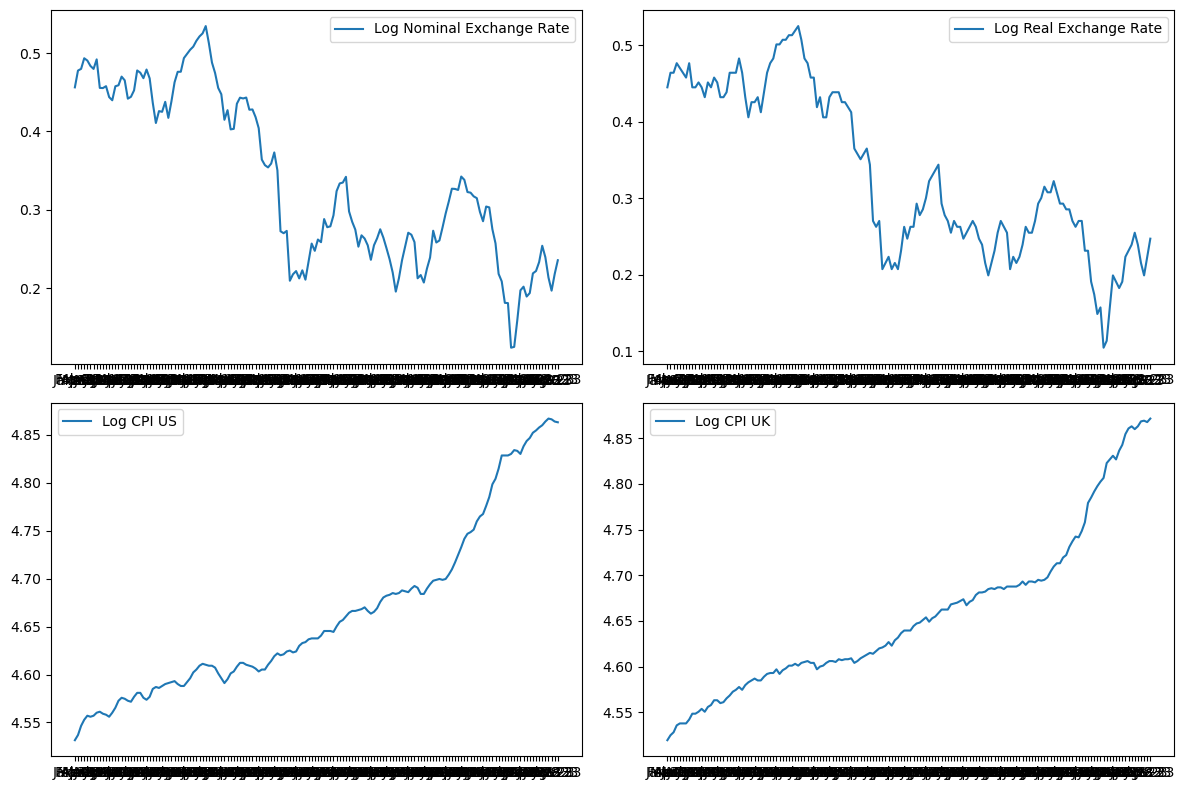

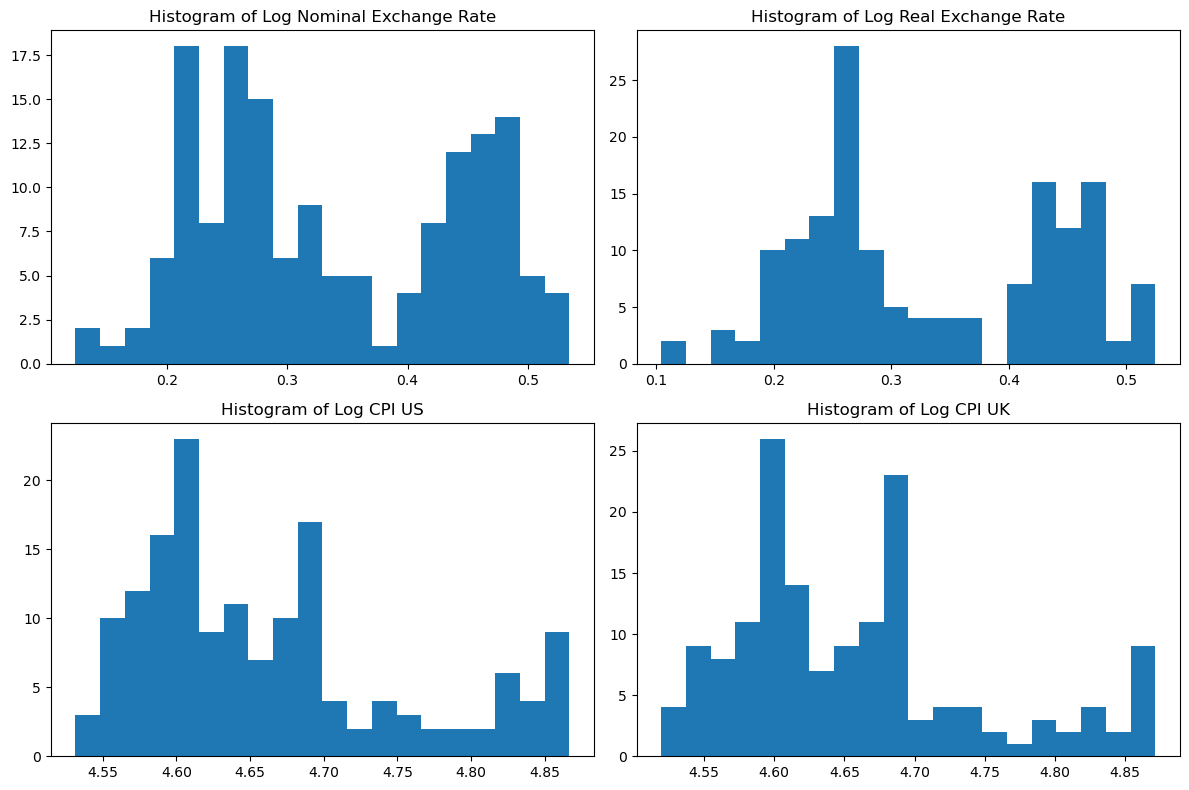

In [5]:
# Time series plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['NER_log'], label='Log Nominal Exchange Rate')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['RER_log'], label='Log Real Exchange Rate')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['CPI US_log'], label='Log CPI US')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['CPI UK_log'], label='Log CPI UK')
plt.legend()

plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['NER_log'], bins=20)
plt.title('Histogram of Log Nominal Exchange Rate')

plt.subplot(2, 2, 2)
plt.hist(df['RER_log'], bins=20)
plt.title('Histogram of Log Real Exchange Rate')

plt.subplot(2, 2, 3)
plt.hist(df['CPI US_log'], bins=20)
plt.title('Histogram of Log CPI US')

plt.subplot(2, 2, 4)
plt.hist(df['CPI UK_log'], bins=20)
plt.title('Histogram of Log CPI UK')

plt.tight_layout()
plt.show()


In [6]:
# Descriptive statistics
description = df[['NER_log', 'RER_log', 'CPI US_log', 'CPI UK_log']].describe()
print(description)


          NER_log     RER_log  CPI US_log  CPI UK_log
count  156.000000  156.000000  156.000000  156.000000
mean     0.337697    0.331626    4.663651    4.657545
std      0.107729    0.107900    0.089828    0.087917
min      0.123986    0.104360    4.531524    4.519612
25%      0.252488    0.246860    4.595877    4.597894
50%      0.316014    0.292670    4.637637    4.639572
75%      0.443419    0.438255    4.698661    4.693181
max      0.534503    0.524729    4.866765    4.871373


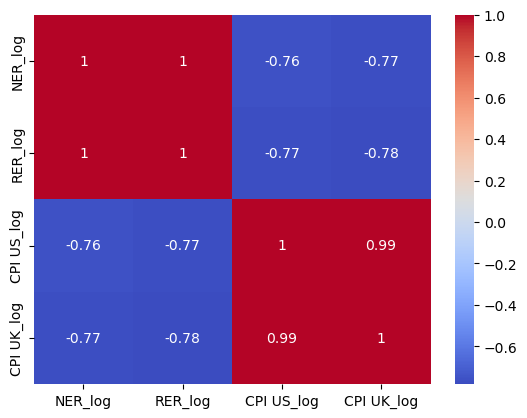

In [7]:
import seaborn as sns
correlation_matrix = df[['NER_log', 'RER_log', 'CPI US_log', 'CPI UK_log']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
df['price_level_ratio'] = df['CPI UK'] / df['CPI US']

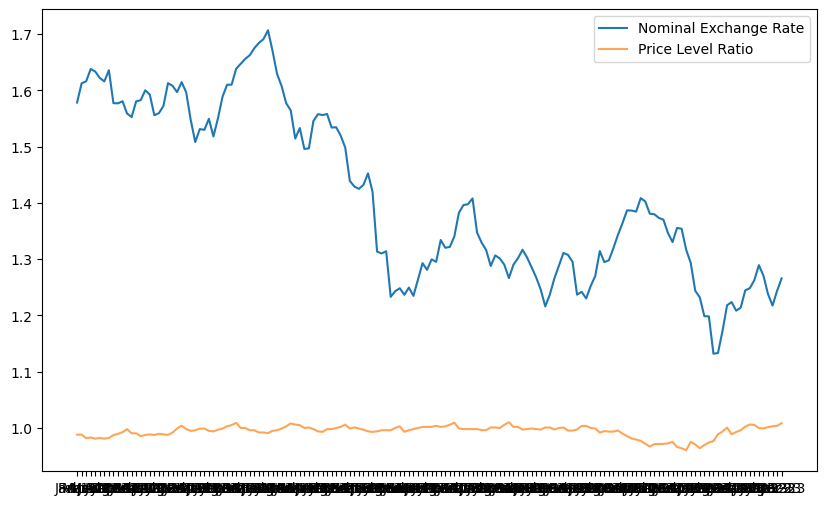

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['NER'], label='Nominal Exchange Rate')
plt.plot(df['Date'], df['price_level_ratio'], label='Price Level Ratio', alpha=0.7)
plt.legend()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05:
        print('The series is stationary')
    else:
        print('The series is non-stationary')

# Check stationarity of original data
print("Stationarity check for original data:")
for column in ['NER', 'CPI UK', 'CPI US', 'RER']:
    print(f"\nColumn: {column}")
    adf_test(df[column])

Stationarity check for original data:

Column: NER
ADF Statistic: -1.4986429511602697
p-value: 0.5341825444337047
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677
The series is non-stationary

Column: CPI UK
ADF Statistic: 0.38552803968521254
p-value: 0.9809456012120628
Critical Values:
	1%: -3.4776006742422374
	5%: -2.882265832283648
	10%: -2.5778219289774156
The series is non-stationary

Column: CPI US
ADF Statistic: 0.17537588865933237
p-value: 0.970846188472526
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is non-stationary

Column: RER
ADF Statistic: -1.4083050848192575
p-value: 0.5782881436410486
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677
The series is non-stationary


In [11]:
# Make necessary transformations if stationarity is not present
df2 = df.copy()

for column in ['NER', 'CPI UK', 'CPI US', 'RER']:
    # Take the first difference of the series
    df2[f'{column}_diff'] = df2[column].diff()
    
    # Fill the missing value with the original value
    df2[f'{column}_diff'].fillna(df2[column], inplace=True)
# Check stationarity of transformed data
print("\nStationarity check for transformed data:")
for column in ['NER_diff', 'CPI UK_diff', 'CPI US_diff', 'RER_diff']:
    print(f"\nColumn: {column}")
    adf_test(df2[column])


Stationarity check for transformed data:

Column: NER_diff
ADF Statistic: -60.125784652723674
p-value: 0.0
Critical Values:
	1%: -3.4732590518613002
	5%: -2.880374082105334
	10%: -2.5768120811654525
The series is stationary

Column: CPI UK_diff
ADF Statistic: -1.6222783480580691
p-value: 0.4715350502425038
Critical Values:
	1%: -3.477261624048995
	5%: -2.8821181874544233
	10%: -2.5777431104939494
The series is non-stationary

Column: CPI US_diff
ADF Statistic: -2.267626501427636
p-value: 0.18262168907172482
Critical Values:
	1%: -3.476273058920005
	5%: -2.881687616548444
	10%: -2.5775132580261593
The series is non-stationary

Column: RER_diff
ADF Statistic: -59.45857853587437
p-value: 0.0
Critical Values:
	1%: -3.4732590518613002
	5%: -2.880374082105334
	10%: -2.5768120811654525
The series is stationary


### Test the Absolute form of PPP

In [13]:
import statsmodels.api as sm


In [14]:
# Absolute PPP Test (Regression)

X = sm.add_constant(np.log(df2['price_level_ratio']))
y = df2['NER_log']
model_abs = sm.OLS(y, X).fit()

# Print the results
print("Absolute PPP Test Results:")
print(model_abs.summary())

Absolute PPP Test Results:
                            OLS Regression Results                            
Dep. Variable:                NER_log   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.06412
Date:                Fri, 05 Apr 2024   Prob (F-statistic):              0.800
Time:                        04:50:33   Log-Likelihood:                 126.77
No. Observations:                 156   AIC:                            -249.5
Df Residuals:                     154   BIC:                            -243.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const      

### Testing the relative form of PPP

In [15]:
# Calculate the inflation rates (percentage change in CPI)
df2['Inflation_UK'] = df2['CPI UK'].pct_change()
df2['Inflation_US'] = df2['CPI US'].pct_change()

# Calculate the difference in inflation rates
df2['Inflation_Diff'] = df2['Inflation_US'] - df2['Inflation_UK']

# Calculate the change in the log of the exchange rate
df2['NER_Change'] = df2['NER'].pct_change()
df3 = df2[1:]

# Perform the regression
X = sm.add_constant(df3['Inflation_Diff'])
y = df3['NER_Change']
model_rel = sm.OLS(y, X).fit()

# Print the results
print("\nRelative PPP Test Results:")
print(model_rel.summary())


Relative PPP Test Results:
                            OLS Regression Results                            
Dep. Variable:             NER_Change   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.422
Date:                Fri, 05 Apr 2024   Prob (F-statistic):              0.235
Time:                        04:50:39   Log-Likelihood:                 396.16
No. Observations:                 155   AIC:                            -788.3
Df Residuals:                     153   BIC:                            -782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [16]:
df3.to_excel('Final_Dataset.xlsx', index=False)

plt.scatter(df3['Inflation_Diff'], df3['exchange_rate_change'], alpha=0.5)
plt.xlabel('Inflation Rate Difference (Germany - US)')
plt.ylabel('Exchange Rate Percentage Change')
plt.plot(X['inflation_rate_diff'], model.predict(X), color='red')
plt.show()

In [95]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [20]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Stationarity Check for RER_log:
ADF Statistic: -1.4459530429615104
p-value: 0.5600583418728565


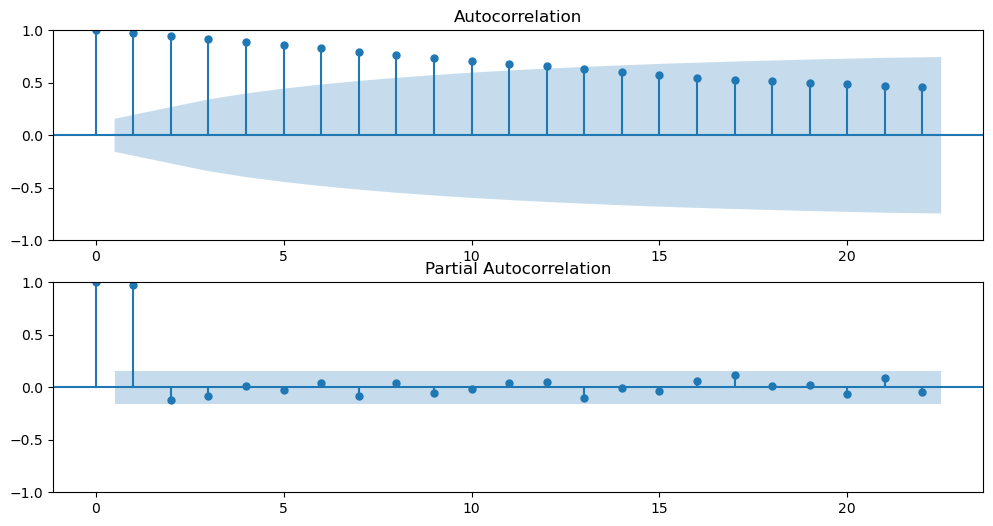

In [22]:
df = pd.read_excel('Final_Dataset.xlsx')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.set_index('Date', inplace=True)

# Check stationarity of RER_log
print('Stationarity Check for RER_log:')
result = adfuller(df['RER_log'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df['RER_log'], ax=axes[0])
plot_pacf(df['RER_log'], ax=axes[1])
plt.show()


Stationarity Check for RER_log_diff:
ADF Statistic: -10.894426736835065
p-value: 1.2022449484475296e-19


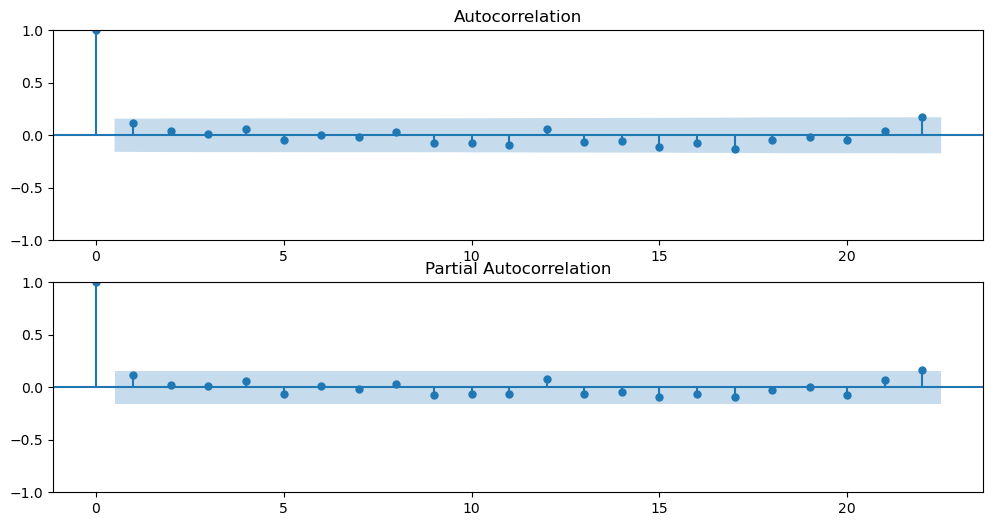

In [23]:
# If non-stationary, make it stationary by differencing
if result[1] > 0.05:
    df['RER_log_diff'] = df['RER_log'].diff()
    df = df.dropna()
    print('Stationarity Check for RER_log_diff:')
    result = adfuller(df['RER_log_diff'])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df['RER_log_diff'], ax=axes[0])
plot_pacf(df['RER_log_diff'], ax=axes[1])
plt.show()

In [24]:
# Identify optimal ARIMA orders
model = pm.auto_arima(df['RER_log_diff'], seasonal=False, trace=True)
print(f'Best ARIMA Model: {model.order}')
print(f'AIC: {model.aic()}')

# Fit the ARIMA model
arima_model = ARIMA(df['RER_log_diff'], order=model.order)
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-771.897, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-777.580, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-777.757, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-777.602, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-775.921, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-775.977, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-773.993, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-776.392, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.342 seconds
Best ARIMA Model: (1, 0, 0)
AIC: -777.7574770910787
                               SARIMAX Results                                
Dep. Variable:           RER_log_diff   No. Observations:                  154
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 391.196
Date:                Fri, 05 Apr 2024   AIC                    

C:\Users\kasar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kasar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kasar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kasar\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


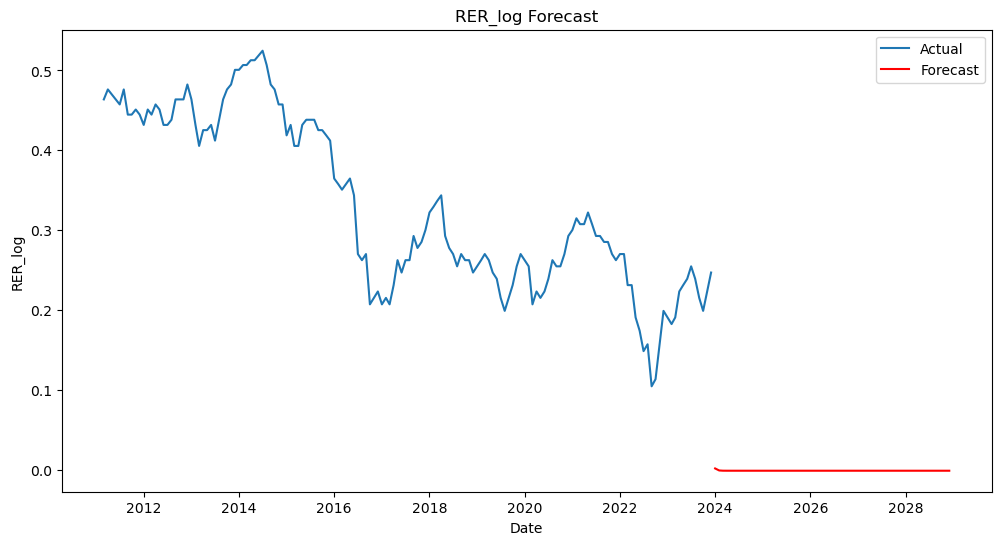

In [25]:
# Forecast RER_log for the next 60 periods
forecast = arima_model_fit.forecast(steps=60)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RER_log'])
plt.plot(forecast.index, forecast, color='r')
plt.title('RER_log Forecast')
plt.xlabel('Date')
plt.ylabel('RER_log')
plt.legend(['Actual', 'Forecast'])
plt.show()
